In [41]:
# Adrian Soto
# 2016-09-13
# Institute for Advanced Computational Science
# Stony Brook University
#
# Analysis and solution
#
import numpy as np
from random import randint
import matplotlib.pyplot as plt
import networkx as nx

In [42]:
# Load networks
def loadA(Afile, delim=' '):
# Read adjacency matrix from file

    A = np.loadtxt(Afile)
    return A 

# Load all matrices into a numpy.array
A1=loadA('./data/A1.dat')
A2=loadA('./data/A2.dat')
A3=loadA('./data/A3.dat')
A4=loadA('./data/A4.dat')
A5=loadA('./data/A5.dat')


 
   ------   A 1  ANALYSIS   ------    
 


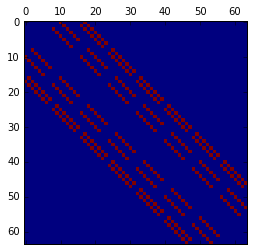

# of connected components = 1
[2, 3, 4, 4, 4, 4, 3, 2, 3, 4, 6, 6, 6, 6, 4, 3, 4, 6, 8, 8, 8, 8, 6, 4, 4, 6, 8, 8, 8, 8, 6, 4, 4, 6, 8, 8, 8, 8, 6, 4, 4, 6, 8, 8, 8, 8, 6, 4, 3, 4, 6, 6, 6, 6, 4, 3, 2, 3, 4, 4, 4, 4, 3, 2]


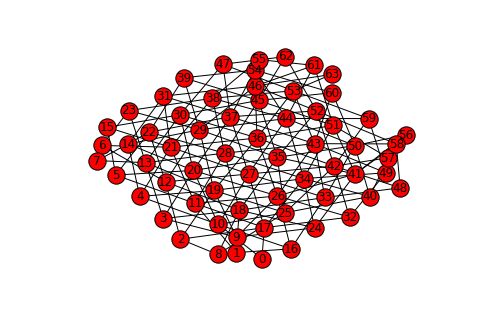

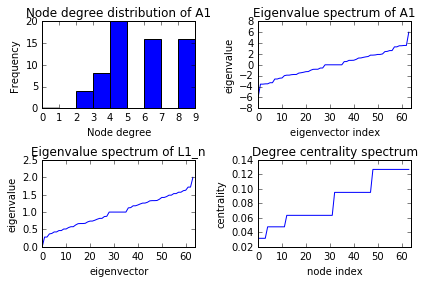

 
   ------   A 2  ANALYSIS   ------    
 


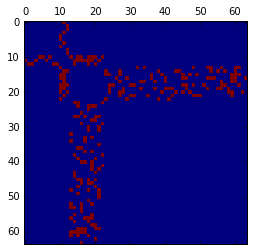

# of connected components = 1
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 10, 7, 9, 11, 13, 14, 9, 14, 14, 12, 10, 5, 3, 4, 1, 1, 5, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2, 1, 4, 3, 2, 3, 2, 1, 1, 3, 3, 1, 2, 4, 2, 2, 5, 5, 3, 1, 1]


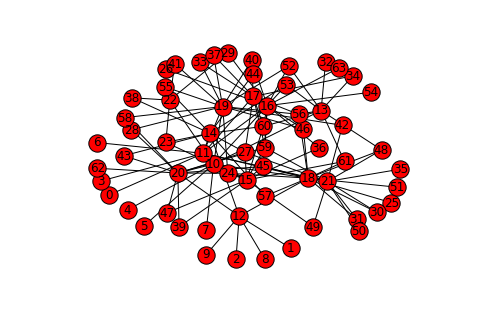

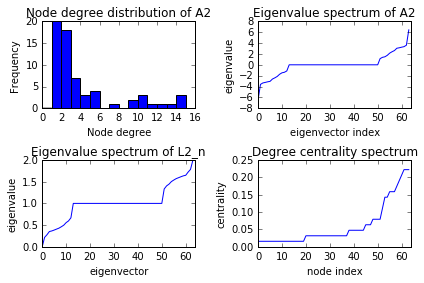

 
   ------   A 3  ANALYSIS   ------    
 


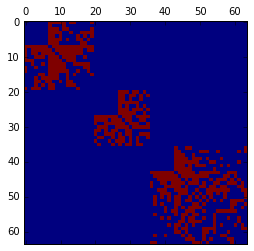

# of connected components = 3
[8, 2, 6, 9, 6, 8, 5, 19, 17, 14, 12, 10, 12, 9, 9, 8, 7, 7, 7, 7, 6, 6, 4, 6, 4, 7, 6, 14, 11, 11, 12, 7, 10, 8, 7, 7, 4, 8, 4, 9, 10, 9, 6, 21, 18, 16, 17, 15, 17, 13, 11, 14, 10, 9, 13, 7, 9, 8, 9, 9, 7, 7, 7, 7]


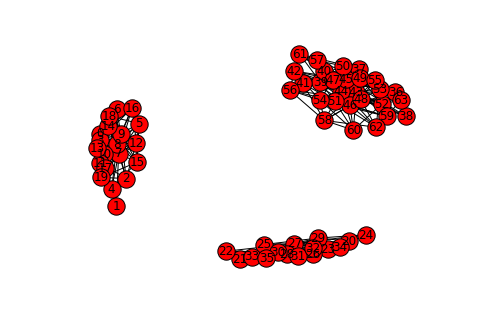

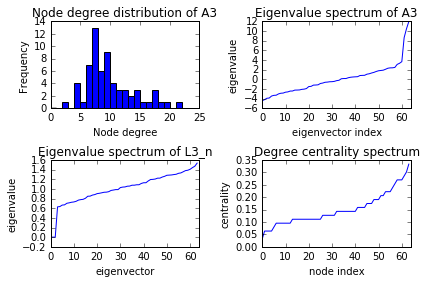

 
   ------   A 4  ANALYSIS   ------    
 


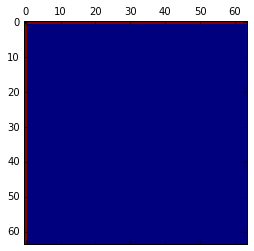

# of connected components = 1
[63, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


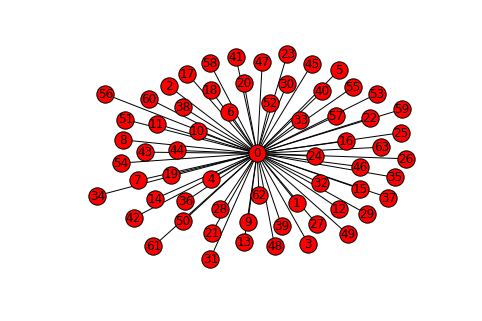

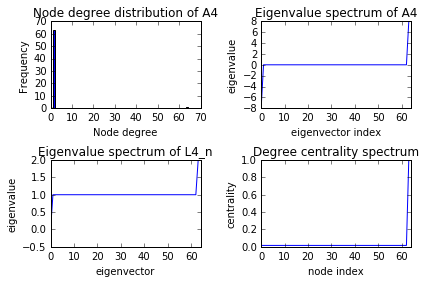

 
   ------   A 5  ANALYSIS   ------    
 


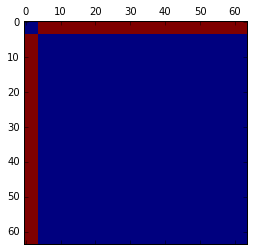

# of connected components = 1
[60, 60, 60, 60, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


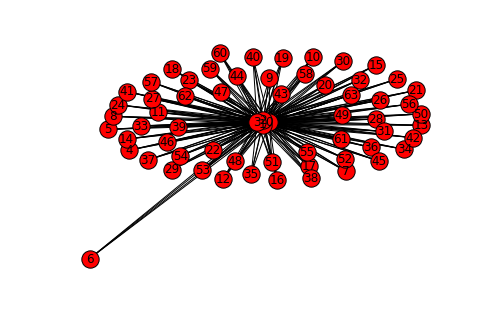

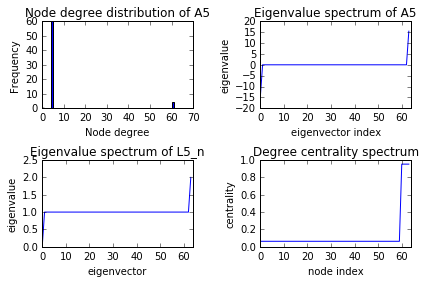

In [54]:
# A1
%matplotlib inline

Aall=[A1,A2,A3,A4,A5]

for i in range(1,6):
    
    A=Aall[i-1]
    
    print " "
    print "   ------   A",i," ANALYSIS   ------    "
    print " "
    
    
    # Use Networkx package to initialize class instance
    G=nx.from_numpy_matrix(A)

    plt.matshow(A)
    plt.show()

    NCC=nx.number_connected_components(G)
    print "# of connected components =", NCC
    nx.draw(G, with_labels=True)
    #plt.show()

    
            
    # Prepare subplots
    fig = plt.figure()
    axD=fig.add_subplot(221)
    axA=fig.add_subplot(222)
    axL=fig.add_subplot(223)
    axC=fig.add_subplot(224)
    
    
    edges=np.arange(0,max(nx.degree(G).values())+2)
    axD.hist(sorted(nx.degree(G).values()), edges)
    axD.set_xlabel('Node degree')
    axD.set_ylabel('Frequency')
    axD.title.set_text('Node degree distribution of A'+str(i))
    

    A=nx.to_numpy_matrix(G)
    axA.plot(np.sort(np.linalg.eigvals( A ) ) )
    axA.set_xlim(0,np.shape(A)[0])
    axA.set_xlabel('eigenvector index')
    axA.set_ylabel('eigenvalue')
    axA.title.set_text('Eigenvalue spectrum of A'+str(i))
    
    
    L=nx.normalized_laplacian_matrix(G)
    axL.plot(np.sort(np.linalg.eigvals( L.todense() ) ) )
    axL.set_xlim(0,np.shape(L)[0])
    axL.set_xlabel('eigenvector')
    axL.set_ylabel('eigenvalue')
    axL.title.set_text('Eigenvalue spectrum of L'+str(i)+'_n')
    #plt.show()

    C=nx.degree_centrality(G)
    axC.plot(np.sort(C.values()) )
    axC.set_xlim(0,np.shape(L)[0])
    axC.set_xlabel('node index')
    axC.set_ylabel('centrality')
    axC.title.set_text('Degree centrality spectrum')
    
    plt.tight_layout()
    plt.show()



In [ ]:
nx.biparti